**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO DEMONSTRATE *CLASSIFICATION BOUNDARY VISUALIZATION* WITH *matplotlib*. 🐍📊🤖**

This script demonstrates how to visualize classification boundaries of a trained model using matplotlib. It helps in understanding how a classifier separates different classes in a 2D feature space.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### 📥 Load Dataset & Prepare the Data
We’ll use only 2 features to make 2D plotting possible.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 🤖 Train a Classifier
We train a simple KNN classifier for demonstration.

In [3]:
# Create and train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### ⚙️ Create a Meshgrid for Plotting Decision Boundaries
We create a fine grid of points across the 2D feature space to evaluate model predictions on.

In [4]:
# Define the bounds of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Flatten grid to pass into model
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

### 📈 Visualize the Decision Boundaries
Plot the classification regions and overlay training points.

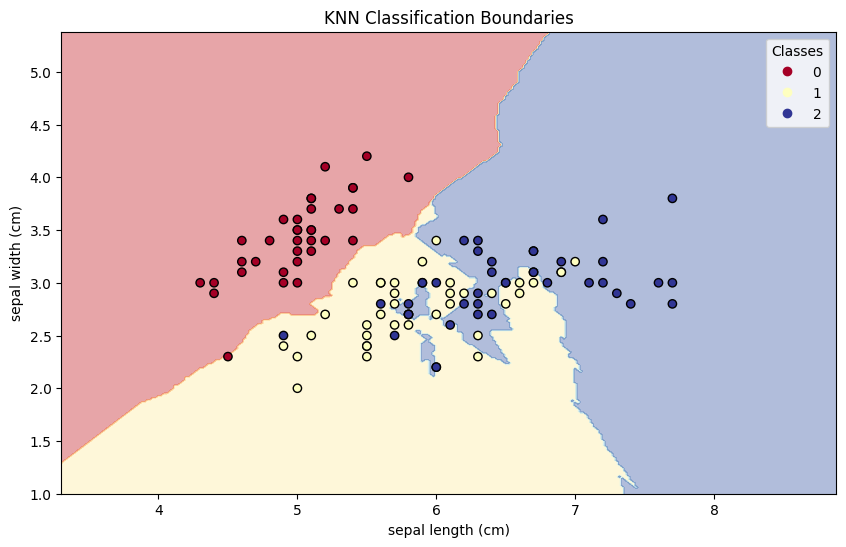

In [5]:
plt.figure(figsize=(10, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Classification Boundaries")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()